<a href="https://colab.research.google.com/github/dass2001ad/Cognifyz_data_science_Internship/blob/main/Level_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

**Table Booking and Online Delivery**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Dataset .csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Determining the percentage of restaurants thatoffer table booking and online delivery.**

In [ ]:
total_restaurants = len(data)
table_booking_count = data['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0).sum()
online_delivery_count = data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0).sum()
table_booking_percentage = (table_booking_count / total_restaurants) * 100
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100

print(f"Percentage of restaurants offering table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


**Comparing the average ratings of restaurants with table booking and those without.**

In [ ]:
print(data.columns)
data['rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')
average_rating = data['rating'].mean()
print(f"Average rating of all restaurants: {average_rating:.2f}")

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Average rating of all restaurants: 2.67


In [ ]:
print(data.columns)
data['rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')

with_table_booking = data[data['Has Table booking'] == 'Yes']
without_table_booking = data[data['Has Table booking'] == 'No']

average_rating_with_booking = with_table_booking['rating'].mean()
average_rating_without_booking = without_table_booking['rating'].mean()

print(f"Average rating of restaurants with table booking: {average_rating_with_booking:.2f}")
print(f"Average rating of restaurants without table booking: {average_rating_without_booking:.2f}")

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'rating'],
      dtype='object')
Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56


**Analyzing the availability of online delivery among restaurants with different price ranges.**

[3 4 2 1]
['No' 'Yes']
   Price Range  Online Delivery Availability
0            1                      0.157741
1            2                      0.413106
2            3                      0.291903
3            4                      0.090444


<ipython-input-45-8cdbd1783d34>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price Range', y='Online Delivery Availability', data=delivery_by_price, palette='viridis')


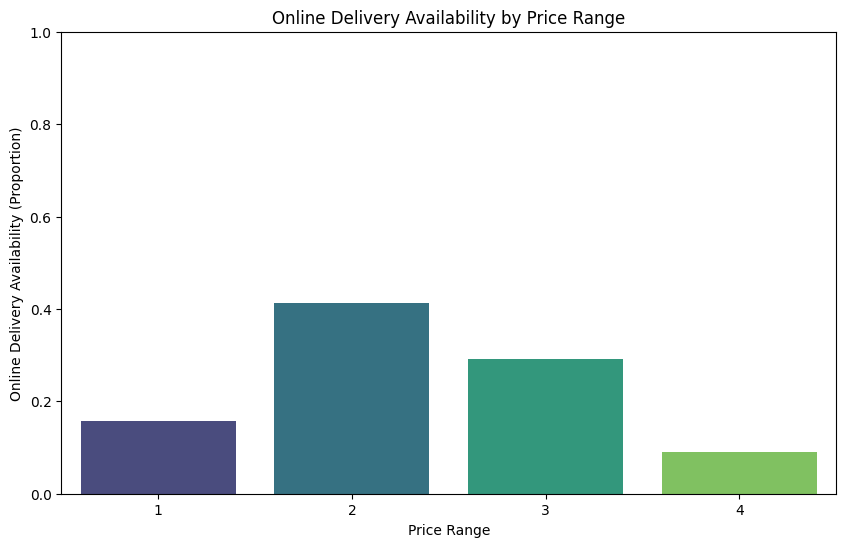

In [ ]:
print(data['Price range'].unique())
print(data['Has Online delivery'].unique())
data['online_delivery'] = data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
delivery_by_price = data.groupby('Price range')['online_delivery'].mean().reset_index()
delivery_by_price.columns = ['Price Range', 'Online Delivery Availability']
print(delivery_by_price)

plt.figure(figsize=(10, 6))
sns.barplot(x='Price Range', y='Online Delivery Availability', data=delivery_by_price, palette='viridis')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Online Delivery Availability (Proportion)')
plt.ylim(0, 1)
plt.show()

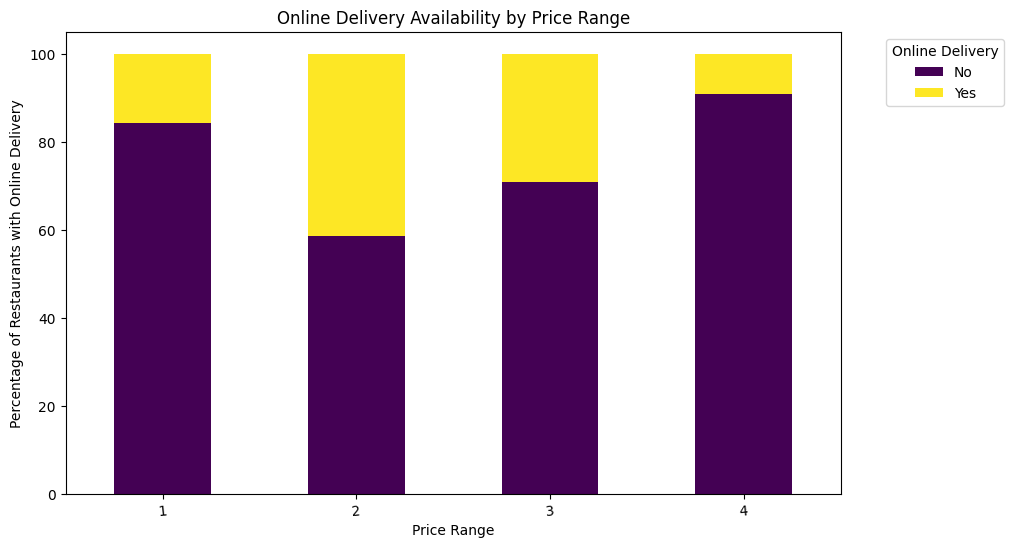

In [ ]:
Odpr = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100

Odpr.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.xticks(rotation = 5)
plt.legend(title='Online Delivery', bbox_to_anchor=(1.05, 1))

plt.show()

# **Task 2**

**Price Range Analysis**

**Determining the most common price range among all the restaurants.**

In [ ]:
data["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [ ]:
mostcommon = data["Price range"].mode()[0]

print("Most Common Price range among all the restaurant : ", mostcommon)

Most Common Price range among all the restaurant :  1


In [ ]:
from collections import Counter
price_ranges = data['Price range'].tolist()
price_counts = Counter(price_ranges)
most_common_price_range = price_counts.most_common()[0][0]

print(f"The most common price range among all restaurants is: {most_common_price_range}")

The most common price range among all restaurants is: 1


**Calculating the average rating for each price range.**

In [ ]:
average_ratings = data.groupby('Price range')['Aggregate rating'].mean().reset_index()
print("Average rating for each price range:")
print(average_ratings)

Average rating for each price range:
   Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918


**Identifying the color that represents the highest average rating among different price ranges.**

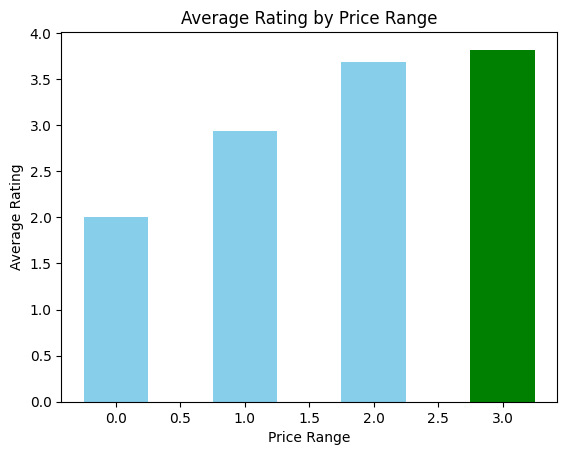

In [ ]:
average_ratings_values = average_ratings['Aggregate rating']
highest_avg_rating_color = average_ratings_values.idxmax()
plt.bar(average_ratings_values.index, average_ratings_values, color='skyblue', width=0.5)
plt.bar(highest_avg_rating_color, average_ratings_values[highest_avg_rating_color], color='green', width=0.5)

plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.show()

# **Task 3**

**Feature Engineering**

**Extracting additional features from the existing columns, such as the length of the restaurant name or address.**

In [ ]:
data['name_length'] = data['Restaurant Name'].apply(lambda x: len(str(x).strip()))
data['address_length'] = data['Address'].apply(lambda x: len(str(x).strip()))

print("First few rows with additional features:")
print("Accessing specific columns:")
data[['Restaurant Name', 'name_length', 'Address', 'address_length']].head(10)

First few rows with additional features:
Accessing specific columns:


,Restaurant Name,name_length,Address,address_length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64
5,Din Tai Fung,12,"Ground Floor, Mega Fashion Hall, SM Megamall, ...",71
6,Buffet 101,10,"Building K, SM By The Bay, Sunset Boulevard, M...",83
7,Vikings,7,"Building B, By The Bay, Seaside Boulevard, Mal...",81
8,Spiral - Sofitel Philippine Plaza Manila,40,"Plaza Level, Sofitel Philippine Plaza Manila, ...",69
9,Locavore,8,"Brixton Technology Center, 10 Brixton Street, ...",67


**Creating new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.**

In [ ]:
data['Has Table Booking'] = data['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Has Online Delivery'] = data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
data[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']].head(10)

,Has Table booking,Has Table Booking,Has Online delivery,Has Online Delivery
0,Yes,1,No,0
1,Yes,1,No,0
2,Yes,1,No,0
3,No,0,No,0
4,Yes,1,No,0
5,No,0,No,0
6,Yes,1,No,0
7,Yes,1,No,0
8,Yes,1,No,0
9,Yes,1,No,0
